# Introduction

This notebook aims to demonstrate how to deal with the import of large mib datasets (created by the Merlin Medipix direct electron detector often used for gathering scanning electron diffraction data). 

This functionaility has been checked to run in pyxem-0.10.0 (November 2019). Bugs are always possible, do not trust the code blindly, and if you experience any issues please report them here: https://github.com/pyxem/pyxem-demos/issues

Import pyXem and other required libraries

In [1]:
%matplotlib inline
import pyxem as pxm

# 1. Using load_mib function

In [2]:
data_path = '/dls/science/groups/e02/Mohsen/code/pyxem_test/test_data.mib'

This above example dataset is a cropped version of a RAW 6 bit depth rea-out from a quad Medipix camera. We can directly import this to pyxem by using the load_mib function:

In [3]:
dp = pxm.load_mib(data_path)

reshaping using flyback pixel


This function uses the overexposed flyback pixel to find the number of probe positions in a line and then reshapes it to an array with the correct dimensions, in this case 10 by 12 probe positions.

In [4]:
print(dp)

<LazyElectronDiffraction2D, title: , dimensions: (10, 12|515, 515)>


Looking at the metadata below, we can see the exposure time per frame in seconds and also the times for the overexposed flyback frames. By default we apply a vertical flip to the diffraction pattern. Note that the number of probe positions in x (scan_x) is outputed as 11, this is the bright pixel corresponding to flyback that is cropped in the returned data.

In [5]:
dp.metadata

├── General
│   └── title = 
└── Signal
    ├── binned = False
    ├── exposure_time = 0.001
    ├── flip = True
    ├── flyback_times = [0.057]
    ├── frames_number_skipped = 0
    ├── scan_X = 11
    └── signal_type = electron_diffraction2d

This object is a lazy signal, so before plotting we need to load to disc by compute method.

In [6]:
dp.compute()

[########################################] | 100% Completed |  0.2s


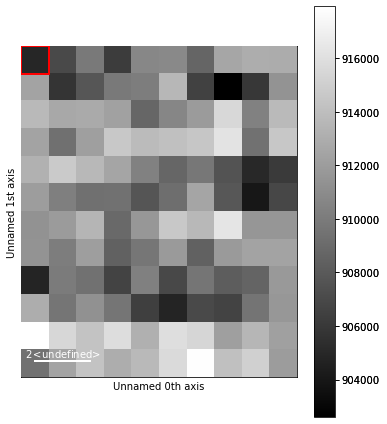

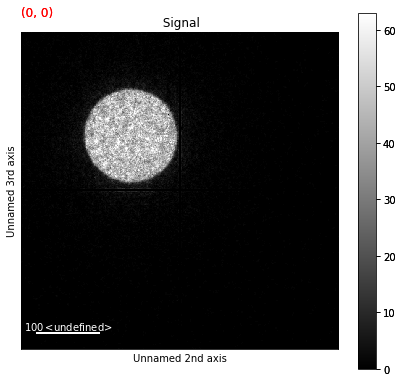

In [7]:
dp.plot()

# 2. Using mib_to_h5stack method before load_mib

If the mib data is 1 bit and large scan array, e.g. 512*512, the dask operation done for the other bit depths would fail, requiring the full loading of data into disk. This makes the lazy loading of this format using the load_mib method above very memory-intensive.

To solve this issue, in pyxem we can use the mib_to_h5stack method to firstly save the data as stack of diffraction patterns as an h5 file: 

In [8]:
h5_path = '/dls/science/groups/e02/Mohsen/code/pyxem_test/test_data.h5'

pxm.utils.io_utils.mib_to_h5stack(data_path, h5_path)

The h5 path provided already exists. Change file name to avoid overwrite.


and then using the load_mib method with new keword argument pointing to the h5 file saved above to lazily load and reshape the data:

In [9]:
dp = pxm.load_mib(data_path, h5_path)

reshaping using flyback pixel


In [10]:
print(dp)

<LazyElectronDiffraction2D, title: , dimensions: (10, 12|515, 515)>


In [11]:
dp.compute()

[########################################] | 100% Completed |  0.1s


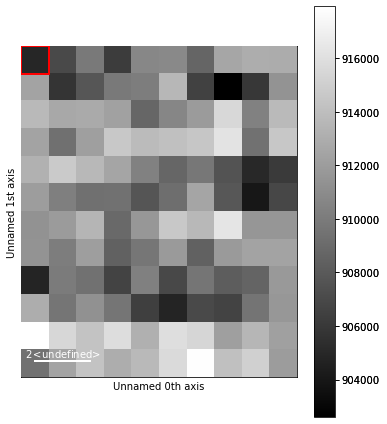

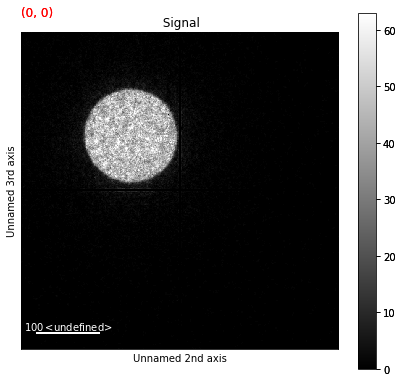

In [12]:
dp.plot()